### Thermal infrared image timeseries notebook

---

**<<<The code below only needs to be ran once, to download the data file. You can comment it out afterwards>>>**

Download a sample airborne IR netcdf file that contains 17 image mosaics from the morning of Feb. 8th, 2020.
(Start by downloading [driveanon](https://github.com/friedrichknuth/driveanon) to download sample file from google drive using "pip install")

In [3]:
%%capture
!pip install git+https://github.com/friedrichknuth/driveanon.git

In [4]:
# import driveanon
import driveanon as da

In [5]:
# download and save the file
folder_blob_id = '1BYz63HsSilPcQpCWPNZOp62ZZU2OdeWO'
file_names, file_blob_ids = da.list_blobs(folder_blob_id,'.nc')
print(file_names, file_blob_ids)
da.save(file_blob_ids[0])

['SNOWEX2020_IR_PLANE_2020Feb08_mosaicked_APLUW_v2.nc'] ['1Rgw7y7hmnefZyMQXosQvF0g_rJRkoMPx']


'SNOWEX2020_IR_PLANE_2020Feb08_mosaicked_APLUW_v2.nc'

**<<<The above code only needs to be ran once, to download the data file. You can comment it out afterwards>>>**

---

Load a point of interest from the SnowEx SQL database:

In [3]:
# Import some packages for working with the SnowEx SQL database
from snowexsql.db import get_db # Import the connection function from the snowexsql library
from  snowexsql.data import SiteData # Import the table classes from our data module which is where our ORM classes are defined 
from datetime import date # Import some tools to build dates 
from snowexsql.conversions import query_to_geopandas # Import a useful function for plotting and saving queries! See https://snowexsql.readthedocs.io/en/latest/snowexsql.html#module-snowexsql.conversions

Get the location for snow pit 2S10 from the SnowEx SQL database (query [SiteData](https://snowexsql.readthedocs.io/en/latest/database_structure.html#sites-table) using [filter_by](https://docs.sqlalchemy.org/en/14/orm/query.html#sqlalchemy.orm.Query.filter_by) to find the entry with the site ID that we want). Then preview the resulting geodataframe.

In [4]:
# This is what you will use for all of hackweek to access the db
db_name = 'snow:hackweek@52.32.183.144/snowex'
# Using the function get_db, we receive 2 ways to interact with the database
engine, session = get_db(db_name)

In [5]:
# Form the query to receive site_id='2S10' from the sites table
qry = session.query(SiteData).filter_by(site_id='2S10')

# Convert the record received into a geopandas dataframe
siteData_df = query_to_geopandas(qry, engine)

# Preview the resulting geopandas dataframe
siteData_df

,site_name,date,time_created,time_updated,id,site_id,doi,date_accessed,latitude,longitude,...,weather_description,precip,sky_cover,wind,ground_condition,ground_roughness,ground_vegetation,vegetation_height,tree_canopy,site_notes
0,Grand Mesa,2020-02-05,2021-06-01 18:41:44.586420+00:00,None,115,2S10,https://doi.org/10.5067/DUD2VZEVBJ7S,None,39.019474,-108.192314,...,"Sunny and cold, some blowing snow",None,Few (< 1/4 of sky),Moderate,Frozen,Rough,"Grass, Shrub","20, 30",No Trees,None


---

In [31]:
# import xarray and rioxarray packages we'll need
import xarray as xr
import rioxarray

import matplotlib.pyplot as plt

In [14]:
# open the NetCDF file we downloaded
ds = xr.open_dataset('SNOWEX2020_IR_PLANE_2020Feb08_mosaicked_APLUW_v2.nc')

In [15]:
# To make rioxarray happy, we should rename our spatial coorinates "x" and "y" (it automatically looks for coordinates with these names)
# We want to look at the variable "STBmosaic", this has our temperatures in degrees C
da = ds.STBmosaic.rename({'easting':'x', 'northing':'y'})  # create a new data array of "STBmosaic" with the renamed coordinates
da = da.rio.write_crs('epsg:32613') # overwrite itself, having re-assigned the correct crs!

In [16]:
# Reproject the airborne IR imagery into EPSG:26912
da = da.rio.reproject('EPSG:26912') # overwrite itself with new reprojected data array

In [17]:
# see what our dataset looks like
da

<xarray.DataArray 'STBmosaic' (time: 17, y: 3848, x: 4398)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 7.371e+05 7.371e+05 ... 7.591e+05 7.591e+05
  * y            (y) float64 4.332e+06 4.332e+06 ... 4.313e+06 4.313e+06
  * time         (time) object '2020-02-08T15:07:17.946189' ... '2020-02-08T1...
    spatial_ref  int64 0
Attributes:
    units:        Celsius
    description:  land and snow surface brightness temperature - no emissivit...

Make a plot, using "isel" to select the first (0) time index:

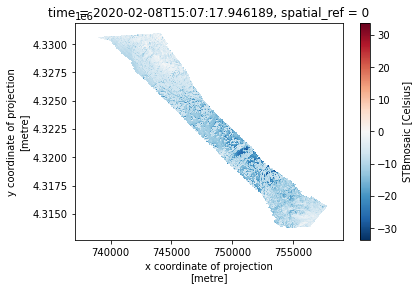

In [18]:
da.isel(time=0).plot()

Define a box for an area we want to look at:

In [19]:
# reminder of where our snow pit is at
siteData_df.geometry.bounds

,minx,miny,maxx,maxy
0,743076.0,4322689.0,743076.0,4322689.0


In [20]:
# set up our box bounding coordinates
minx = 742000
miny = 4322000
maxx = 743000
maxy = 4323000

In [21]:
da_clipped = da.rio.clip_box(minx,miny,maxx,maxy)

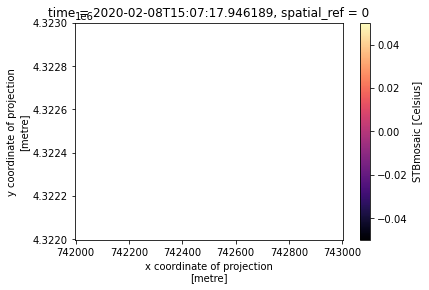

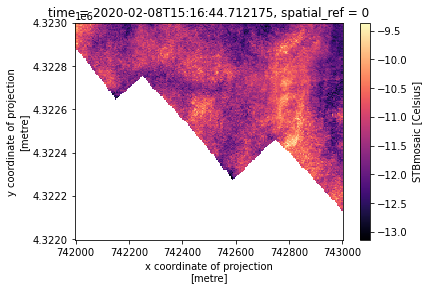

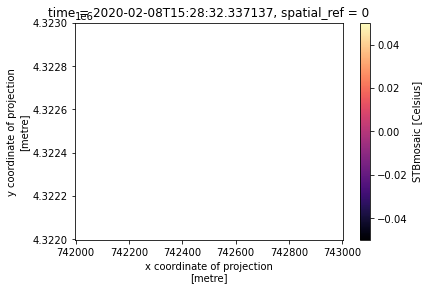

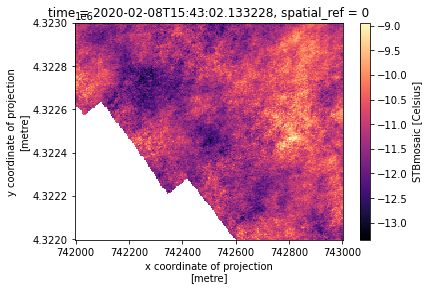

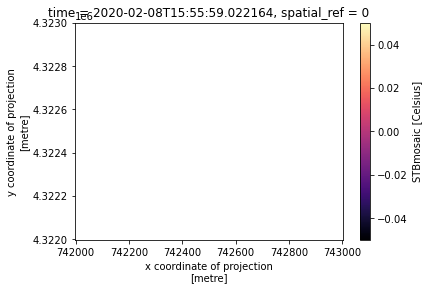

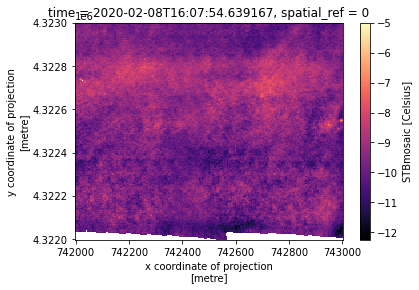

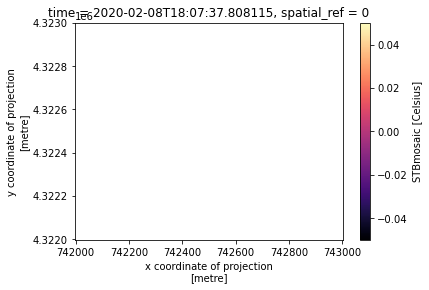

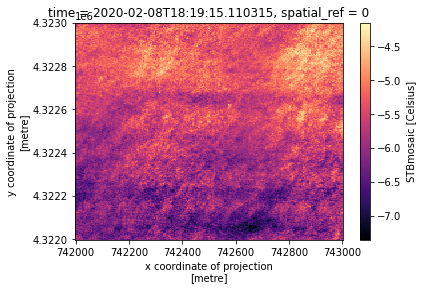

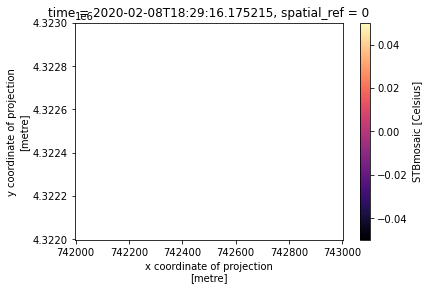

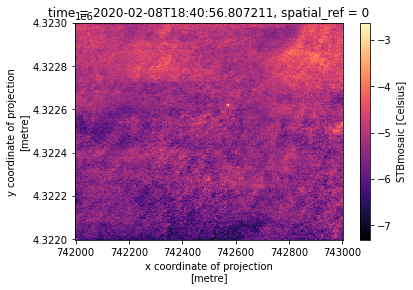

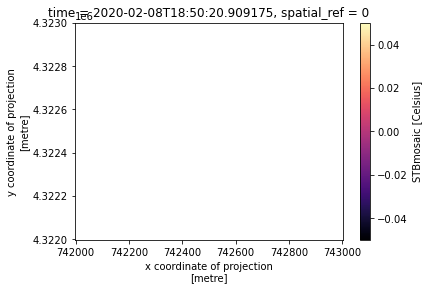

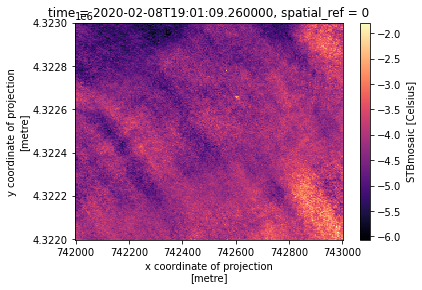

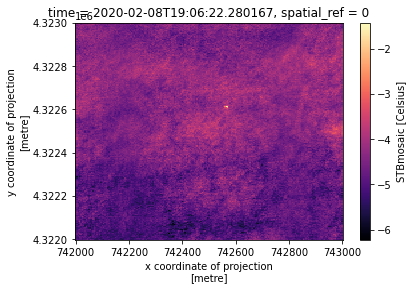

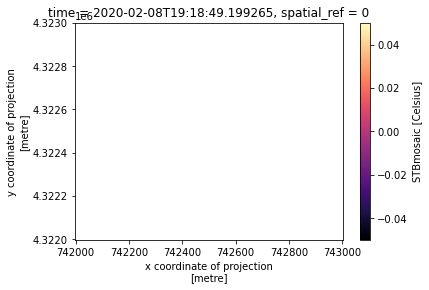

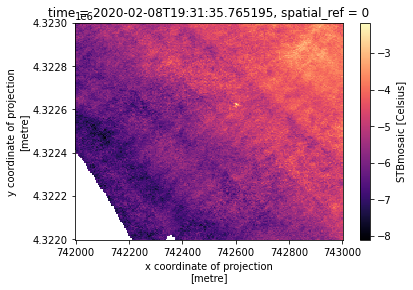

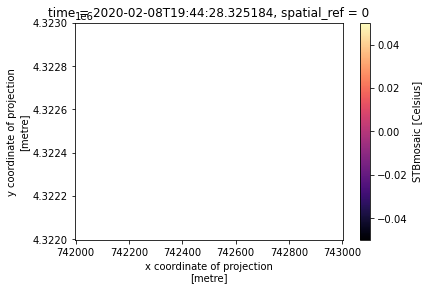

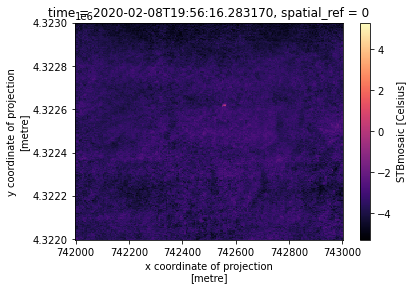

In [32]:
for da_clipped_step in da_clipped:
    fig, ax = plt.subplots()
    
    da_clipped_step.plot(ax=ax,cmap='magma')

(array([  27.,  422., 1697., 3766., 5799., 4955., 2673.,  727.,  130.,
          21.]),
 array([-13.144781, -12.7665  , -12.38822 , -12.009939, -11.631659,
        -11.253378, -10.875097, -10.496817, -10.118536,  -9.740255,
         -9.361975], dtype=float32),
 <BarContainer object of 10 artists>)

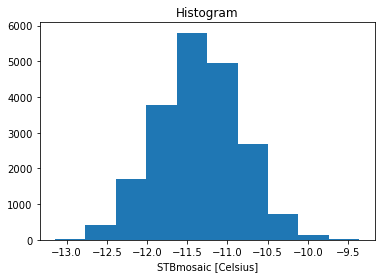

In [26]:
da_clipped.isel(time=1).plot.hist()

In [27]:
da_clipped.isel(time=1).mean()

<xarray.DataArray 'STBmosaic' ()>
array(-11.357292, dtype=float32)
Coordinates:
    time         <U26 '2020-02-08T15:16:44.712175'
    spatial_ref  int64 0